In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd

from scipy.stats import pearsonr, spearmanr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

FILE_PATH = "/home/jingbozhou/Project/CombDrug/runAddMut/9-plot/rawData/"

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, p = pearsonr(x, y)
    #r, p = spearmanr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'R = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

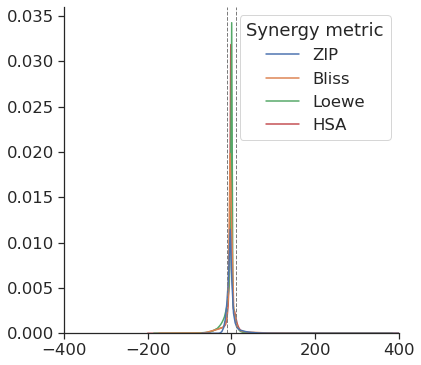

In [2]:
raw_data = pd.read_table(os.path.join(FILE_PATH, "all_comb_data.tsv"))

plot_data = raw_data[['ZIP', 'Bliss', 'Loewe', 'HSA']].melt(var_name="Synergy metric", value_name='Value')
plot_data = plot_data[plot_data["Value"]<1000]

sns.set(font_scale=1.5,  style="ticks", rc={'figure.figsize':(6, 6)})

ax = sns.kdeplot(data=plot_data, x="Value", hue="Synergy metric")

ax.set(xlabel="", ylabel="", xlim=(-400, 400))

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.axvline(x=10, linestyle='--', color='#7d7d7d', linewidth=1)
ax.axvline(x=-10, linestyle='--', color='#7d7d7d', linewidth=1)

#plt.savefig("./plotFigure/synergy_metrics_dis.svg", format="svg", bbox_inches="tight", transparent=True)